# Data augmentation
random rotations, noise, random flipping 

In [ ]:
# Dependencies
%pip install numpy
%pip install pyvista
%pip install "pyvista[jupyter]" 
%pip install trame ipywidgets
%pip install matplotlib
%pip install torch torchvision torchaudio
%pip install nnunetv2
%pip install simpleitk
%pip install os
%pip install json
%pip install nibabel
%pip install monai
%pip install torchio


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadat

In [10]:
import numpy as np
import SimpleITK as sitk
import pyvista as pv
import matplotlib.pyplot as plt
import os
import json

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

from monai.apps.auto3dseg import AutoRunner
from monai.config import print_config
from monai.data import create_test_image_3d

print_config()

MONAI version: 1.4.0
Numpy version: 1.26.4
Pytorch version: 2.3.1+cu118
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 46a5272196a6c2590ca2589029eed8e4d56ff008
MONAI __file__: /home/<username>/.local/lib/python3.10/site-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 5.3.2
scikit-image version: 0.25.2
scipy version: 1.15.2
Pillow version: 11.1.0
Tensorboard version: 2.14.1
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.18.1+cu118
tqdm version: 4.67.1
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 7.0.0
pandas version: 2.2.3
einops version: 0.8.1
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: 2.21.0
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.
clearml version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, ple

# Loading in the data

In [63]:


sim_datalist = {
    "testing": [
        {"image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_001_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_001.nrrd"},
        {"image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_002_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_002.nrrd"},
    ],
    "training": [
        {"fold": 0, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_003_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_003.nrrd"},
        {"fold": 0, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_004_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_004.nrrd"},
        {"fold": 0, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_005_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_005.nrrd"},
        {"fold": 0, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_006_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_006.nrrd"},
        {"fold": 1, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_007_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_007.nrrd"},
        {"fold": 1, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_008_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_008.nrrd"},
        {"fold": 1, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_009_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_009.nrrd"},
        {"fold": 1, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_010_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_010.nrrd"},
        {"fold": 2, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_011_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_011.nrrd"},
        {"fold": 2, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_012_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_012.nrrd"},
        {"fold": 2, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_013_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_013.nrrd"},
        {"fold": 2, "image": "nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_014_0000.nrrd", "label": "nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_014.nrrd"},
    ],
}

sim_dim = (64, 64, 64)


# Generate images and labels

Augmented Data: [{'image': PosixPath('nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_003_0000.nrrd'), 'label': PosixPath('nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_003.nrrd')}, {'image': PosixPath('nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_004_0000.nrrd'), 'label': PosixPath('nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_004.nrrd')}, {'image': PosixPath('nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_005_0000.nrrd'), 'label': PosixPath('nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_005.nrrd')}, {'image': PosixPath('nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_006_0000.nrrd'), 'label': PosixPath('nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_006.nrrd')}, {'image': PosixPath('nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_007_0000.nrrd'), 'label': PosixPath('nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_007.nrrd')}, {'image': PosixPath('nnUNet_raw/Dataset100_normal/imagesTr/NORMAL_008_0000.nrrd'), 'label': PosixPath('nnUNet_raw/Dataset100_normal/labelsTr/NORMAL_008.nrrd')}, {'image': PosixPa

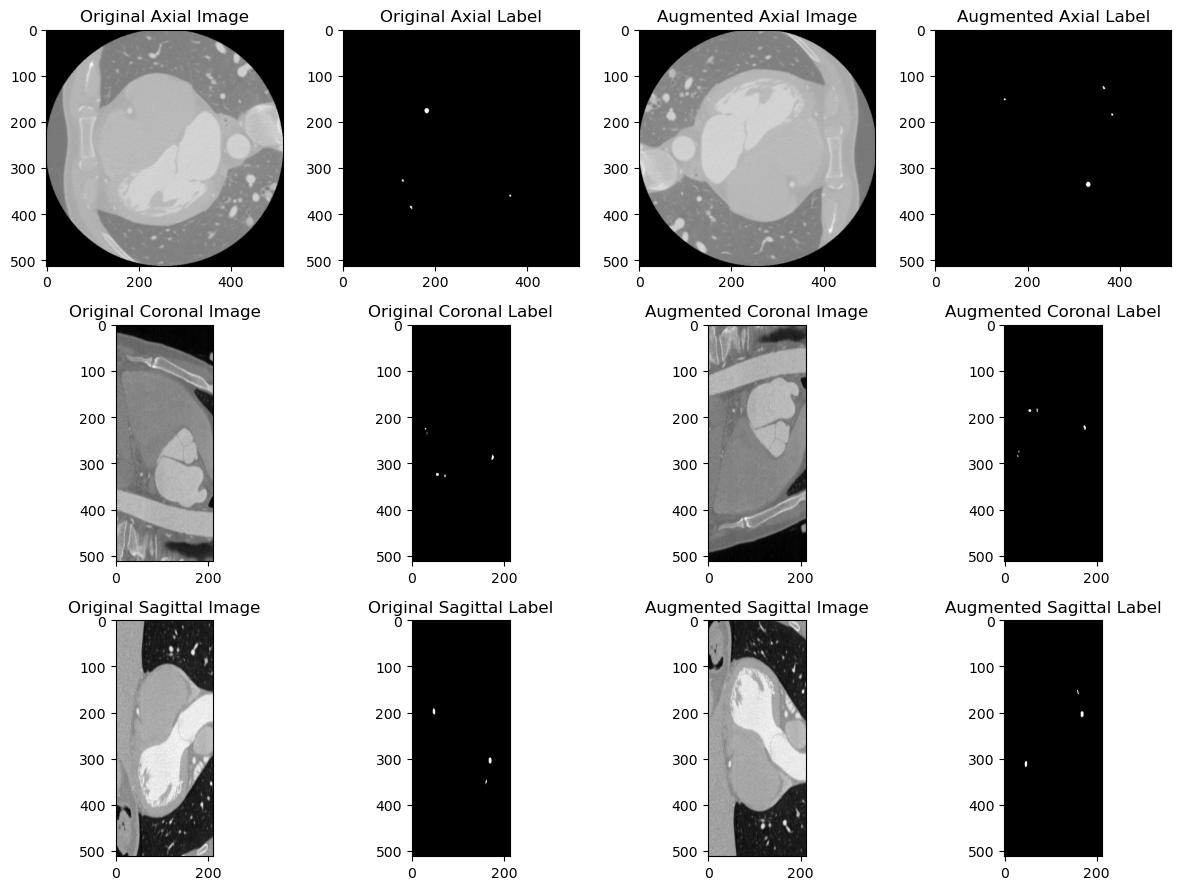

In [68]:
import json
import torchio as tio
import random

# Define augmentation transforms
augmentations = [
    tio.RandomFlip(axes=(0, 1, 2), flip_probability=0.5),  # Randomly flip along any axis
    tio.RandomAffine(scales=(0.9, 1.1), degrees=10),       # Random rotation up to 10 degrees
    tio.RandomNoise(std=0.02),                             # Add random noise
    tio.RandomGamma(log_gamma=(-0.3, 0.3)),               # Random contrast change
]

def apply_augmentation(image_path, label_path):
    """Apply random augmentations to the image-label pair."""
    subject = tio.Subject(
        image=tio.ScalarImage(image_path),
        label=tio.LabelMap(label_path)
    )
    
    transform = tio.Compose(random.sample(augmentations, k=random.randint(1, 3)))  # Apply 1 to 3 random transforms
    transformed = transform(subject)

    return transformed

# Apply augmentation to training data
augmented_data = []
for item in sim_datalist["training"]:
    transformed_subject = apply_augmentation(item["image"], item["label"])
    augmented_data.append({
        "image": transformed_subject["image"].path,
        "label": transformed_subject["label"].path,
    })

# Print results
print("Augmented Data:", augmented_data)

# Apply augmentation to one sample for visualization
sample = sim_datalist["training"][0]  # Take the first training sample
original_subject = tio.Subject(
    image=tio.ScalarImage(sample["image"]),
    label=tio.LabelMap(sample["label"])
)
transformed_subject = apply_augmentation(sample["image"], sample["label"])

# Convert to NumPy arrays for visualization
original_image_np = original_subject["image"].data.numpy()[0]  # Extract first channel
original_label_np = original_subject["label"].data.numpy()[0]
aug_image_np = transformed_subject["image"].data.numpy()[0]
aug_label_np = transformed_subject["label"].data.numpy()[0]

# Select 3 middle slices along different planes
slice_x = original_image_np.shape[0] // 2  # Coronal
slice_y = original_image_np.shape[1] // 2  # Sagittal
slice_z = original_image_np.shape[2] // 2  # Axial

# Plot Original vs. Augmented slices
fig, axes = plt.subplots(3, 4, figsize=(12, 9))

slices = {
    "Axial": (slice_z, 2), 
    "Coronal": (slice_x, 0), 
    "Sagittal": (slice_y, 1)
}

for i, (plane, (slice_idx, axis)) in enumerate(slices.items()):
    # Original Image & Label
    axes[i, 0].imshow(np.take(original_image_np, slice_idx, axis=axis), cmap="gray")
    axes[i, 0].set_title(f"Original {plane} Image")

    axes[i, 1].imshow(np.take(original_label_np, slice_idx, axis=axis), cmap="gray")
    axes[i, 1].set_title(f"Original {plane} Label")

    # Augmented Image & Label
    axes[i, 2].imshow(np.take(aug_image_np, slice_idx, axis=axis), cmap="gray")
    axes[i, 2].set_title(f"Augmented {plane} Image")

    axes[i, 3].imshow(np.take(aug_label_np, slice_idx, axis=axis), cmap="gray")
    axes[i, 3].set_title(f"Augmented {plane} Label")

# Layout adjustments
plt.tight_layout()
plt.show()